Implement Wiener filter over image and comment on them
Compare inverse filter and Wiener filter over image and comment on them

Saving unnamed.png to unnamed.png


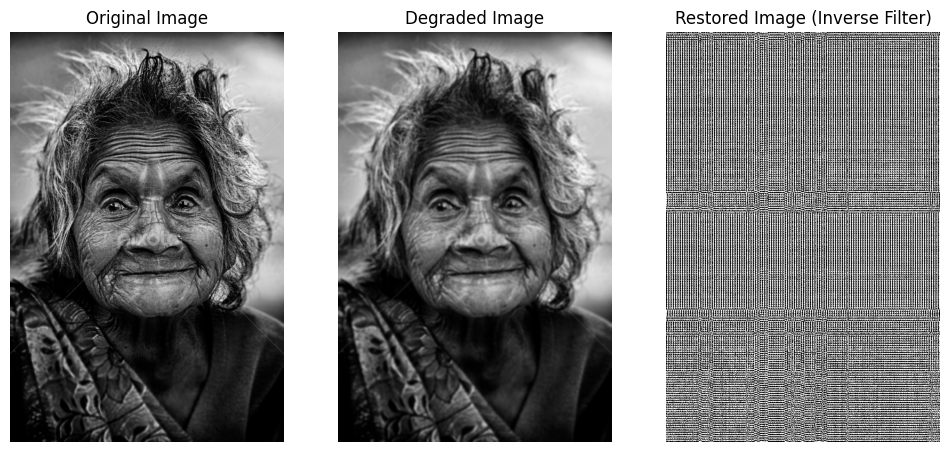

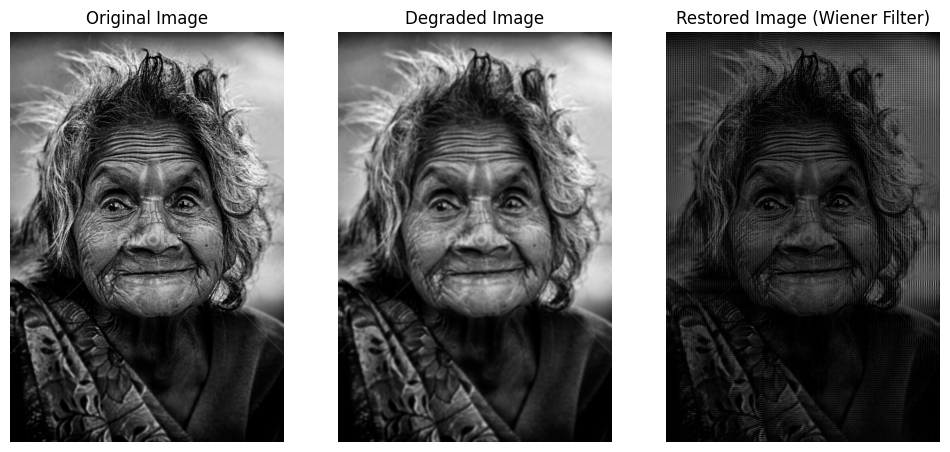

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Simulated degradation function (Blur)
def degrade_image(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    degraded_image = cv2.filter2D(image, -1, kernel)
    return degraded_image

# Inverse filter
def inverse_filter(degraded_image, kernel, eps=1e-8):
    # Fourier transform of the kernel and degraded image
    F_kernel = np.fft.fft2(kernel, s=degraded_image.shape)
    F_degraded = np.fft.fft2(degraded_image)

    # Apply the inverse filter in the frequency domain
    F_restored = np.divide(F_degraded, F_kernel + eps)

    # Inverse Fourier transform
    restored_image = np.fft.ifft2(F_restored).real

    return np.uint8(np.clip(restored_image, 0, 255))

# Wiener filter
def wiener_filter(degraded_image, kernel, snr=0.01):
    # Fourier transform of the kernel and degraded image
    F_kernel = np.fft.fft2(kernel, s=degraded_image.shape)
    F_degraded = np.fft.fft2(degraded_image)

    # Calculate the Wiener filter in the frequency domain
    H = np.conj(F_kernel) / (np.abs(F_kernel) ** 2 + snr)

    # Apply the Wiener filter in the frequency domain
    F_restored = H * F_degraded

    # Inverse Fourier transform
    restored_image = np.fft.ifft2(F_restored).real

    return np.uint8(np.clip(restored_image, 0, 255))

# Upload an image from your local machine
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Simulate degradation (Blur) with a 5x5 kernel
kernel_size = 5
degraded_image = degrade_image(original_image, kernel_size)

# Apply Inverse filter
restored_inverse = inverse_filter(degraded_image, np.ones((kernel_size, kernel_size)))

# Apply Wiener filter
restored_wiener = wiener_filter(degraded_image, np.ones((kernel_size, kernel_size)))

# Plot the results using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(degraded_image, cmap='gray')
plt.title('Degraded Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(restored_inverse, cmap='gray')
plt.title('Restored Image (Inverse Filter)')
plt.axis('off')

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(degraded_image, cmap='gray')
plt.title('Degraded Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(restored_wiener, cmap='gray')
plt.title('Restored Image (Wiener Filter)')
plt.axis('off')

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
